<a href="https://colab.research.google.com/github/Abdelrhman410/IMDB-Analysis/blob/main/IMDB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**$\color{skyblue}{\text{Questions of  the stake holders}}$**

1.Which company has the highest revenue

2.Which company has the lowest revenue

3.Which director has the highest revenue

4.Which director has the lowest revenue

5.What year has the highest revenue

6.What year has the lowest revenue

7.What is the relation between the vote_count and the vote_average 

#**$\color{skyblue}{\text{Code}}$**

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as mp
import seaborn as sb

In [4]:
df  = pd.read_csv("https://raw.githubusercontent.com/YahiaML/TMDb-movies-data-investigation/main/tmdb-movies.csv")

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



#**$\color{skyblue}{\text{Cleaning Data}}$**

In [6]:
df.drop(["id", "imdb_id", "popularity", "tagline","overview", "homepage", "runtime", "genres", "release_date", "budget_adj", "revenue_adj", "cast", "keywords"], axis=1, inplace=True)

In [7]:
df.head()

,budget,revenue,original_title,director,production_companies,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,190000000,1506249360,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10866 non-null  int64  
 1   revenue               10866 non-null  int64  
 2   original_title        10866 non-null  object 
 3   director              10822 non-null  object 
 4   production_companies  9836 non-null   object 
 5   vote_count            10866 non-null  int64  
 6   vote_average          10866 non-null  float64
 7   release_year          10866 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 679.2+ KB


In [9]:
df.isnull().sum()

budget                     0
revenue                    0
original_title             0
director                  44
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [10]:
df.dropna(axis = 0 , inplace = True)

In [11]:
df.isnull().sum()

budget                  0
revenue                 0
original_title          0
director                0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [12]:
df.describe()

,budget,revenue,vote_count,vote_average,release_year
count,9.815000e+03,9.815000e+03,9815.000000,9815.000000,9815.000000
mean,1.611352e+07,4.403753e+07,238.429445,5.966235,2000.892511
std,3.215703e+07,1.223549e+08,601.839897,0.914930,13.033580
min,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000
25%,0.000000e+00,0.000000e+00,18.000000,5.400000,1994.000000
50%,1.300000e+05,0.000000e+00,46.000000,6.000000,2005.000000
75%,1.900000e+07,3.055244e+07,172.000000,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,9767.000000,8.700000,2015.000000


In [13]:
sum(df.duplicated())

1

In [14]:
df = df.drop_duplicates()



#**$\color{skyblue}{\text{Analyze Data}}$**

#Research Question 1 & 2 (Which company has the highest revenue & Which company has the lowest revenue ?)



In [15]:
filtered_rev = df [df['revenue']!=0 ]

In [16]:
df['production_companies'] = df['production_companies'].apply(lambda x: x.split("|")[0])

In [17]:
df.head()

,budget,revenue,original_title,director,production_companies,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,Village Roadshow Pictures,6185,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,Summit Entertainment,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm,5292,7.5,2015
4,190000000,1506249360,Furious 7,James Wan,Universal Pictures,2947,7.3,2015


In [18]:
#companies_names = []
#for company_name in df["production_companies"]:
#  if company_name not in companies_names:
#    companies_names.append(company_name)

In [19]:
companies_names = {}

for company_name in df["production_companies"]:  
  if company_name not in companies_names:
    filtered_revenue = df[df['production_companies']== company_name ]["revenue"].sum()
    companies_names[company_name] = filtered_revenue
   

In [20]:

inverse = [(value, key) for key, value in companies_names.items()]

print(max(inverse)[1],":", max(inverse)[0])
print(min(inverse)[1],":", min(inverse)[0])

Universal Pictures : 40133713507
185 Trax : 0


The answer of the 1st question (Which company has the highest revenue ?) is :

Universal Pictures with 40133713507 revenues

The answer of the 2nd question (Which company has the lowest revenue ?) is :

185 Trax with 0 revenues


#Research Question 3 & 4 (Which director has the highest revenue & Which director has the lowest revenue ?)

In [21]:
df['director'] = df['director'].apply(lambda x: x.split("|")[0])

In [22]:
df.head()

,budget,revenue,original_title,director,production_companies,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,Village Roadshow Pictures,6185,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,Summit Entertainment,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm,5292,7.5,2015
4,190000000,1506249360,Furious 7,James Wan,Universal Pictures,2947,7.3,2015


In [ ]:
directors_names = {}

for director_name in df["director"]:
  if director_name not in directors_names:
    filtered_revenue = df[df['director']== director_name ]["revenue"].sum()
    directors_names[director_name] = filtered_revenue
#directors_names

In [34]:
for key, value in directors_names.items():
  if value == max(directors_names.values()):
    print(key, ":", value)

Steven Spielberg : 9018563772


In [ ]:
for key, value in directors_names.items():
  if value == min(directors_names.values()):
    print(key, ":", value)

The answer of the 3rd question (Which director has the highest revenue ?) is :
Steven Spielberg with 9018563772 revenue

The answer of the 4th question (Which director has the lowest revenue ?) is :A. Todd Smith with 0 revenue

#Research Question 5 & 6 (What year has the highest revenue & What year has the lowestrevenue ?)

In [25]:
production_years = {}

for production_year in df["release_year"]:
   filtered_revenue = df[df['release_year']== production_year ]["revenue"].sum()
   production_years [production_year] = filtered_revenue


In [26]:
inverse = [(value, key) for key, value in production_years.items()]

print(max(inverse)[1],":", max(inverse)[0])
print(min(inverse)[1],":", min(inverse)[0])

2015 : 26759924070
1966 : 84736689


The answer of the 5rd question (what year has the highest revenue ?) is :
2015 with 26759924070 revenue

The answer of the 5rd question (what year has the lowest revenue ?) is :
1966 with 84736689 revenue

#Research Question 7 (What is the relation between the vote_count and the vote_average  ?)

In [27]:
np.unique(df[["vote_count","vote_average"]].head(10),axis=0)

array([[2.480e+03, 6.300e+00],
       [2.598e+03, 5.800e+00],
       [2.893e+03, 6.500e+00],
       [2.947e+03, 7.300e+00],
       [3.929e+03, 7.200e+00],
       [3.935e+03, 8.000e+00],
       [4.572e+03, 7.600e+00],
       [5.292e+03, 7.500e+00],
       [5.562e+03, 6.500e+00],
       [6.185e+03, 7.100e+00]])

In [28]:
df[["vote_count", "vote_average"]].corr()

,vote_count,vote_average
vote_count,1.000000,0.277717
vote_average,0.277717,1.000000


In this way, we found the correlation coefficient between ‘Cylinders’ and ‘Displacement’ is 0.30.




The correlation coefficient is measured on a scale from -1 to +1. A positive correlation coefficient means that there is a perfect positive relationship between the two variables.

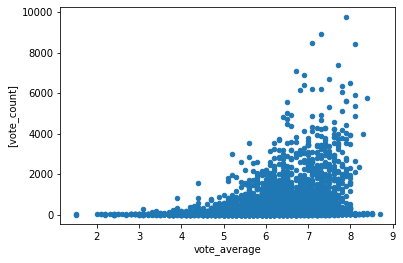

In [33]:
df.plot(x="vote_average", y=["vote_count"], kind="scatter")
mp.show()

From the previous figure, we can deduce direct proportionality between the vote_average & the vote_cont